In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

#declare base 
Base = automap_base()

#use Base class to reflect database table
Base.prepare(engine,reflect = True)
# reflect the tables


In [6]:
# View all of the classes that automap found
#Classes are: 'measurement' and 'station'
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# look in column name 'date'
inspector = inspect(engine)
date_results = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
recent_find=date_results[0]
recent = dt.date(2017,8,23)
recent12 = dt.date(2017,8,23)-dt.timedelta(days = 365)
print(recent12)
inspector.get_columns('measurement')


2016-08-23


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
yearLat = recent12.strftime("%Y-%m-%d")
print(yearLat)

2016-08-23


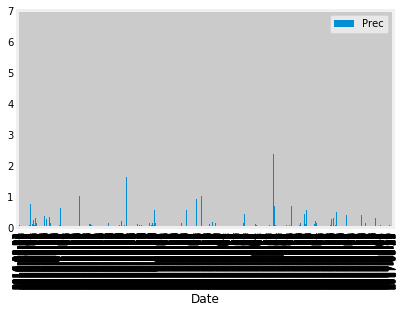

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

yearLat = recent12.strftime("%Y-%m-%d")
last_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= yearLat ).\
    order_by(Measurement.date.desc()).all()
# Perform a query to retrieve the data and precipitation scores
date_unpacked = [s[0] for s in last_year[:]]
prec_unpacked =[s[1] for s in last_year[:]]

# Save the query results as a Pandas DataFrame and set the index to the date column


df_frame={'Date': date_unpacked,
           'Prec': prec_unpacked}

prec_df = pd.DataFrame(df_frame)
prec_df=prec_df.set_index('Date')
# Sort the dataframe by date

prec_df=prec_df.sort_values('Date')
prec_df.head()
# Use Pandas Plotting with Matplotlib to plot the data

prec_df.plot(kind='bar')

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_groups = prec_df.groupby("Date")
agg_sum_stat = (date_groups["Prec"]).agg(func = ['mean','median','var','std','sem'])
agg_sum_stat.head()

,mean,median,var,std,sem
Date,,,,,
2016-08-23,0.451667,0.100,0.499097,0.706468,0.288414
2016-08-24,1.555000,1.800,0.706510,0.840541,0.343150
2016-08-25,0.077143,0.080,0.005157,0.071813,0.027143
2016-08-26,0.016667,0.015,0.000267,0.016330,0.006667
2016-08-27,0.064000,0.020,0.006680,0.081731,0.036551


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
inspector.get_columns('Station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [27]:
station_num = session.query(Station.id).count()
print(station_num)

9


In [56]:
#join Station and Measurement

sel = [Measurement.tobs, Measurement.date, Station.station, Station.id]
station_joined = session.query(*sel).filter(Station.station==Measurement.station).all()
print(type(station_joined))

<class 'list'>


In [61]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

q1 = session.query(Station.station, func.count(Measurement.station)).\
     filter(Station.station == Measurement.station).\
     group_by(Station.station).order_by(func.count(Measurement.station).desc()).all()


q1_again = session.query(Station.id, func.count(Measurement.station)).\
     filter(Station.station == Measurement.station).\
     group_by(Station.id).order_by(func.count(Measurement.station).desc()).all()
q1_again

[(7, 2772),
 (1, 2724),
 (2, 2709),
 (6, 2669),
 (9, 2612),
 (3, 2202),
 (8, 1979),
 (4, 1372),
 (5, 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
q3 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Station.station == Measurement.station)\
    .filter(Station.id == 7).all()
q3

[(54.0, 85.0, 71.66378066378067)]

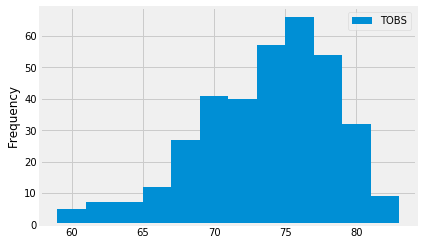

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#get dates of last 12 months for station 7

sev_dates = session.query(Measurement.date).filter(Measurement.station == Station.station)\
    .filter(Station.id == 7).order_by(Measurement.date.desc()).all()


recent_sev = sev_dates[0]

rec_year_sev = dt.date(2017,8,18)-dt.timedelta(days = 365)
rec_yr_sev = rec_year_sev.strftime("%Y-%m-%d")

#query
q4 = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == Station.station)\
    .filter(Station.id == 7)\
    .filter(Measurement.date >= rec_yr_sev)\
    .order_by(Measurement.date.asc()).all()

date_7 = [l[0] for l in q4 [:]]
tobs_7 = [l[1] for l in q4[:]]

df7_frame = {'Date': date_7,
             'TOBS': tobs_7}

df7 = pd.DataFrame(df7_frame)
df7.head()

df7.plot.hist(by='TOBS', bins = 12)

# Close session

In [12]:
# Close Session
session.close()